# VisClaw.jl - examples with CairoMakie.jl
   
<div style="text-align: right;"> VisClaw.jl v1.0.0 </div>
<div style="text-align: right;"> Clawpack v5.12.0 </div>
<div style="text-align: right;"> Takuya Miyashita (miyashita@hydrocoast.jp) </div>
   
## Load conditions and numerical results 
VisClaw.jl refers to a directory `_output` and read files such as `fort.q0000` and `claw.data` in this directory . 
Keep the directory as is after the simulation.  

### Topography (topo)
Topography and bathymetry data is loaded using `loadtopo()`

In [1]:
using VisClaw

## chile2010 _output
simdir = joinpath(CLAW, "geoclaw/examples/tsunami/chile2010/_output")

## load etopo through topo.data
topo = loadtopo(simdir)

## check
println(typeof(topo))
println(fieldnames(typeof(topo)))

VisClaw.Topo
(:ncols, :nrows, :x, :y, :dx, :dy, :elevation)


This process works through reading `topo.data` in `_output` directory.  
Specifying an actual filename　which contains topography data is also available:

In [2]:
# load etopo by specifying a topofile and topotype (topotype=2)
topo = loadtopo(joinpath(CLAW,"geoclaw/scratch/etopo10min120W60W60S0S.asc"), 2)

# check
println(typeof(topo))
println(fieldnames(typeof(topo)))

VisClaw.Topo
(:ncols, :nrows, :x, :y, :dx, :dy, :elevation)


### Displacement of the topography (dtopo)
`dtopo` data can be loaded in the same manner as `topo`:

In [3]:
# load dtopo from dtopo.data
dtopo = loaddtopo(simdir)

# check
println(typeof(dtopo))
println(fieldnames(typeof(dtopo)))

VisClaw.DTopo
(:mx, :my, :x, :y, :dx, :dy, :mt, :t0, :dt, :deform)


### Sea surface elevation
A method `loadsurface()` is useful to load the sea surface heights in `fort.qXXX` files in the form of Adaptive Mesh Refinement (AMR).

In [4]:
# load surface (fort.q0000 to fort.q0018)
amrall = loadsurface(simdir)

# check
println(typeof(amrall))
println(fieldnames(typeof(amrall)))
amrall.nstep, amrall.timelap

VisClaw.AMR
(:nstep, :timelap, :amr, :unittime)


(19, [0.0, 1800.0, 3600.0, 5400.0, 7200.0, 9000.0, 10800.0, 12600.0, 14400.0, 16200.0, 18000.0, 19800.0, 21600.0, 23400.0, 25200.0, 27000.0, 28800.0, 30600.0, 32400.0])

## Plot and save

### Plot topo
Functions which names begin with a word `makie` can plot data using `CairoMakie.jl`.
For example, `VisClaw.makietopo(topo::VisClaw.Topo)` allows to illustrate topography and bathymetry data.
The keyword arguments of the function are the same as those of `CairoMakie.heatmap()`.

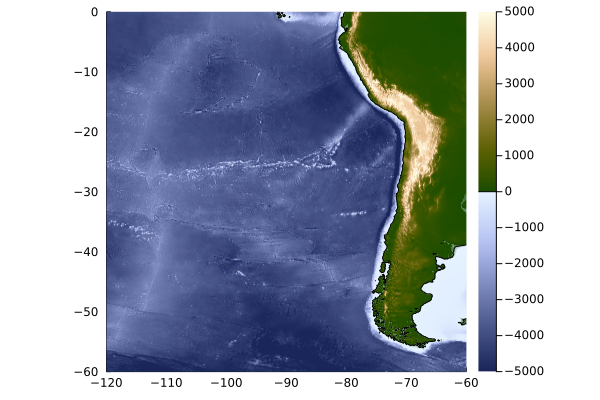

In [5]:
using CairoMakie
fig = makietopo(topo; colormap=:topo, colorrange=(-5000,5000))

### Plot dtopo
Use `makiedtopo`.

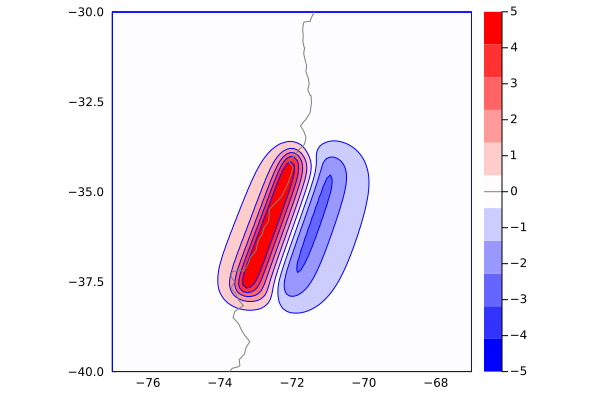

In [6]:
fig = makiedtopo(dtopo; color=:balance, colorrange=(-0.5,0.5))

### Save
The type of the output figure is `CairoMakie.Figure`, so you can save this figure with `CairoMakie.save()`.

In [7]:
CairoMakie.Colorbar(fig[1,2], limits=(-1.0, 1.0), colormap=:balance, flipaxis=true)
CairoMakie.save("chile2010_dtopo.png", fig)

### Plot sea surface elevation
Similarly, a spatial distribution of the sea surface height can be plotted with `VisClaw.makieheatmap()`

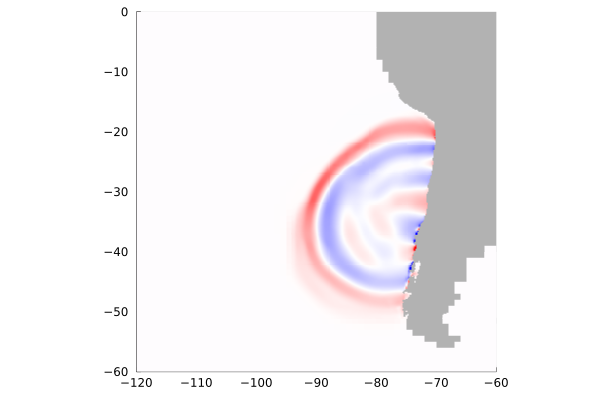

In [8]:
# plot
figs, ax = VisClaw.makieheatmap(amrall; colorrange=(-0.5, 0.5), colormap=:balance)
for i = 1:length(figs)
    CairoMakie.Colorbar(figs[i][1,2], limits=(-0.5, 0.5), colormap=:balance, label="m")
end
figs[6]

### Plot AMR grid patches
`VisClaw.tilenumber!()` and `VisClaw.tilebound!()` overlay AMR tile numbers and tile ranges on the figure, respectively.

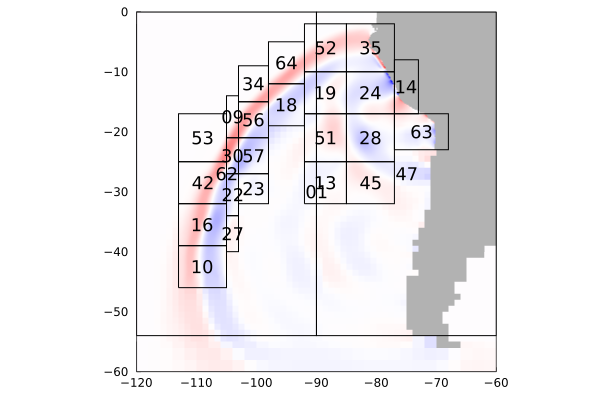

In [9]:
# overlay the grid numbers, and the tiles
for i = 1:amrall.nstep
    VisClaw.tilenumber!(ax[i], amrall.amr[i])
    VisClaw.tilebound!(ax[i], amrall.amr[i])
end

# show a snapshot
figs[6]